## <center>CITS5508 Lab sheet 5</center>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Task 1

In [2]:
df = pd.read_csv(
    'abalone.data', 
    header=None, 
    names=[
        'sex', 
        'length', 
        'diameter', 
        'height', 
        'whole_weight', 
        'shucked_weight', 
        'viscera_weight', 
        'shell_weight', 
        'rings'
    ]
)

In [3]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


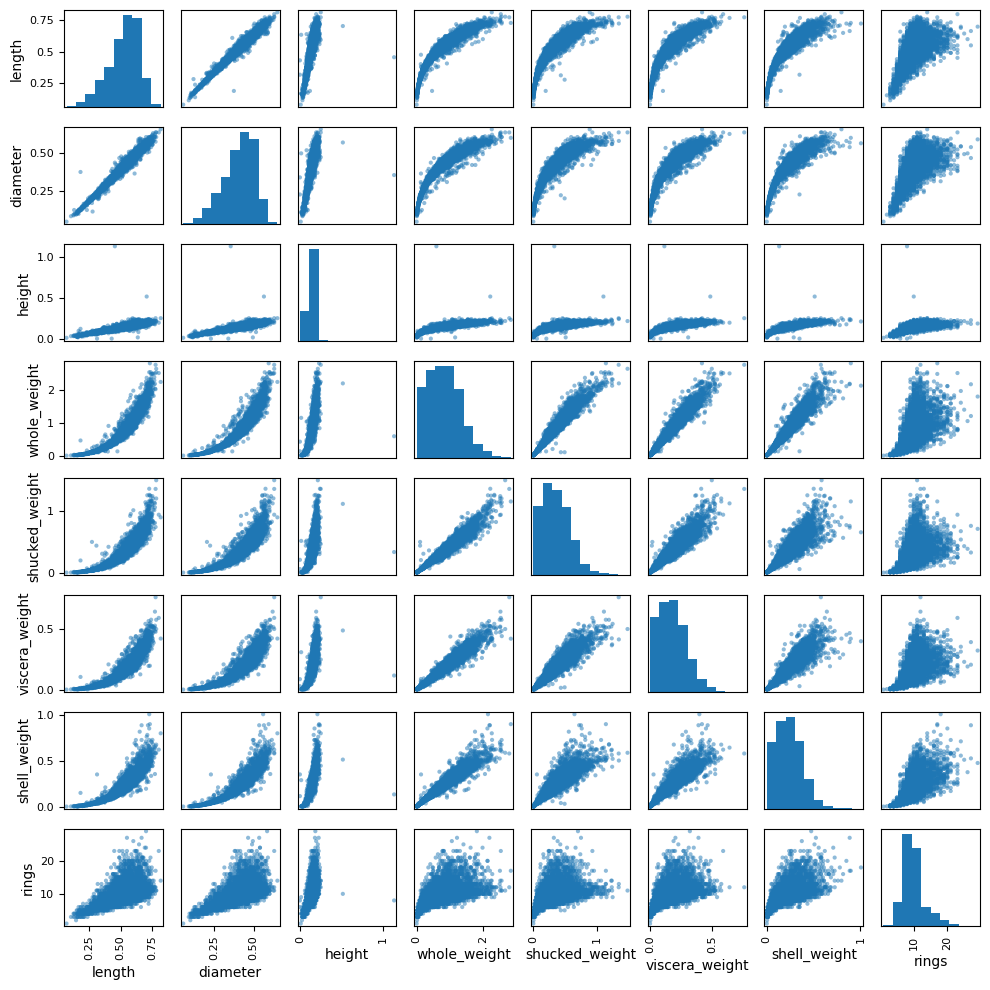

In [4]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(10, 10))

plt.tight_layout()
plt.show()

In [5]:
df.corr(numeric_only=True).style.background_gradient().format('{:.2f}')

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
height,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
whole_weight,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
shucked_weight,0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
viscera_weight,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
shell_weight,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


## Task 2

In [6]:
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [7]:
# integer encode sex
df['sex'] = pd.factorize(df['sex'])[0]

## Task 3

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['rings'])
y = df['rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Task 4

In [9]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [10]:
print(f'depth={dt_regressor.get_depth()}')
print(f'n_leaves={dt_regressor.get_n_leaves()}')

depth=25
n_leaves=2082


## Task 5

In [11]:
# R^2
print(f'train R^2={dt_regressor.score(X_train, y_train):.3f}')
print(f'test R^2={dt_regressor.score(X_test, y_test):3f}')


train R^2=1.000
test R^2=0.103058


## Task 6

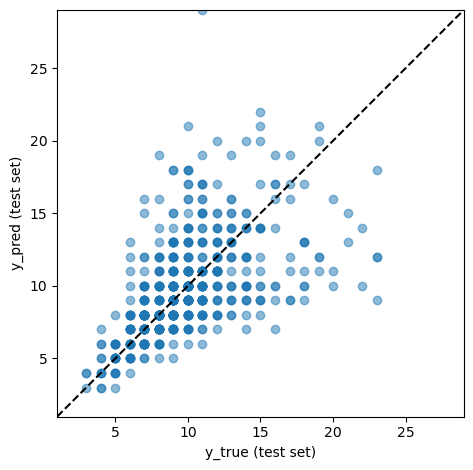

In [12]:
fig, ax = plt.subplots()

ax.scatter(y_test, dt_regressor.predict(X_test), alpha=0.5)
ax.plot([df['rings'].min(), df['rings'].max()], [df['rings'].min(), df['rings'].max()], 'k--')
ax.set_xlim(df['rings'].min(), df['rings'].max())
ax.set_ylim(df['rings'].min(), df['rings'].max())
ax.set_aspect('equal')
ax.set_xlabel('y_true (test set)')
ax.set_ylabel('y_pred (test set)')


plt.tight_layout()
plt.show()


## Task 7

In [13]:
from sklearn.model_selection import GridSearchCV

optim_dt_regressor = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid={
        'max_depth': [3, 5, 7, 9, 11],
        'min_samples_split': [2, 50, 100, 200],
        'max_leaf_nodes': [10, 15, 20, 25, 30, 50],
    },
    cv=5,
    refit=True,
    n_jobs=-1
)
optim_dt_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'max_leaf_nodes': [10, 15, 20, 25, 30, 50],
                         'min_samples_split': [2, 50, 100, 200]})

In [14]:
print(f'train R^2={optim_dt_regressor.score(X_train, y_train):.3f}')
print(f'test R^2={optim_dt_regressor.score(X_test, y_test):3f}')

train R^2=0.566
test R^2=0.513168


In [15]:
optim_dt_regressor.best_params_

{'max_depth': 9, 'max_leaf_nodes': 30, 'min_samples_split': 100}

## Task 8

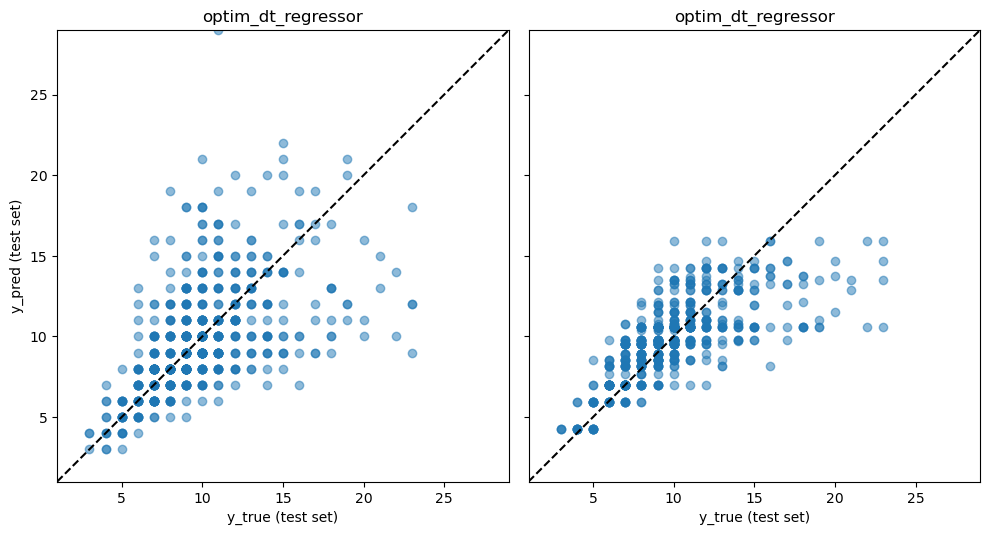

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

axs[0].scatter(y_test, dt_regressor.predict(X_test), alpha=0.5)
axs[1].scatter(y_test, optim_dt_regressor.predict(X_test), alpha=0.5)

for ax in axs:
    ax.plot([df['rings'].min(), df['rings'].max()], [df['rings'].min(), df['rings'].max()], 'k--')
    ax.set_xlim(df['rings'].min(), df['rings'].max())
    ax.set_ylim(df['rings'].min(), df['rings'].max())
    ax.set_aspect('equal')
    ax.set_xlabel('y_true (test set)')
    ax.set_title('optim_dt_regressor')

axs[0].set_ylabel('y_pred (test set)')

plt.tight_layout()
plt.show()


## Task 9

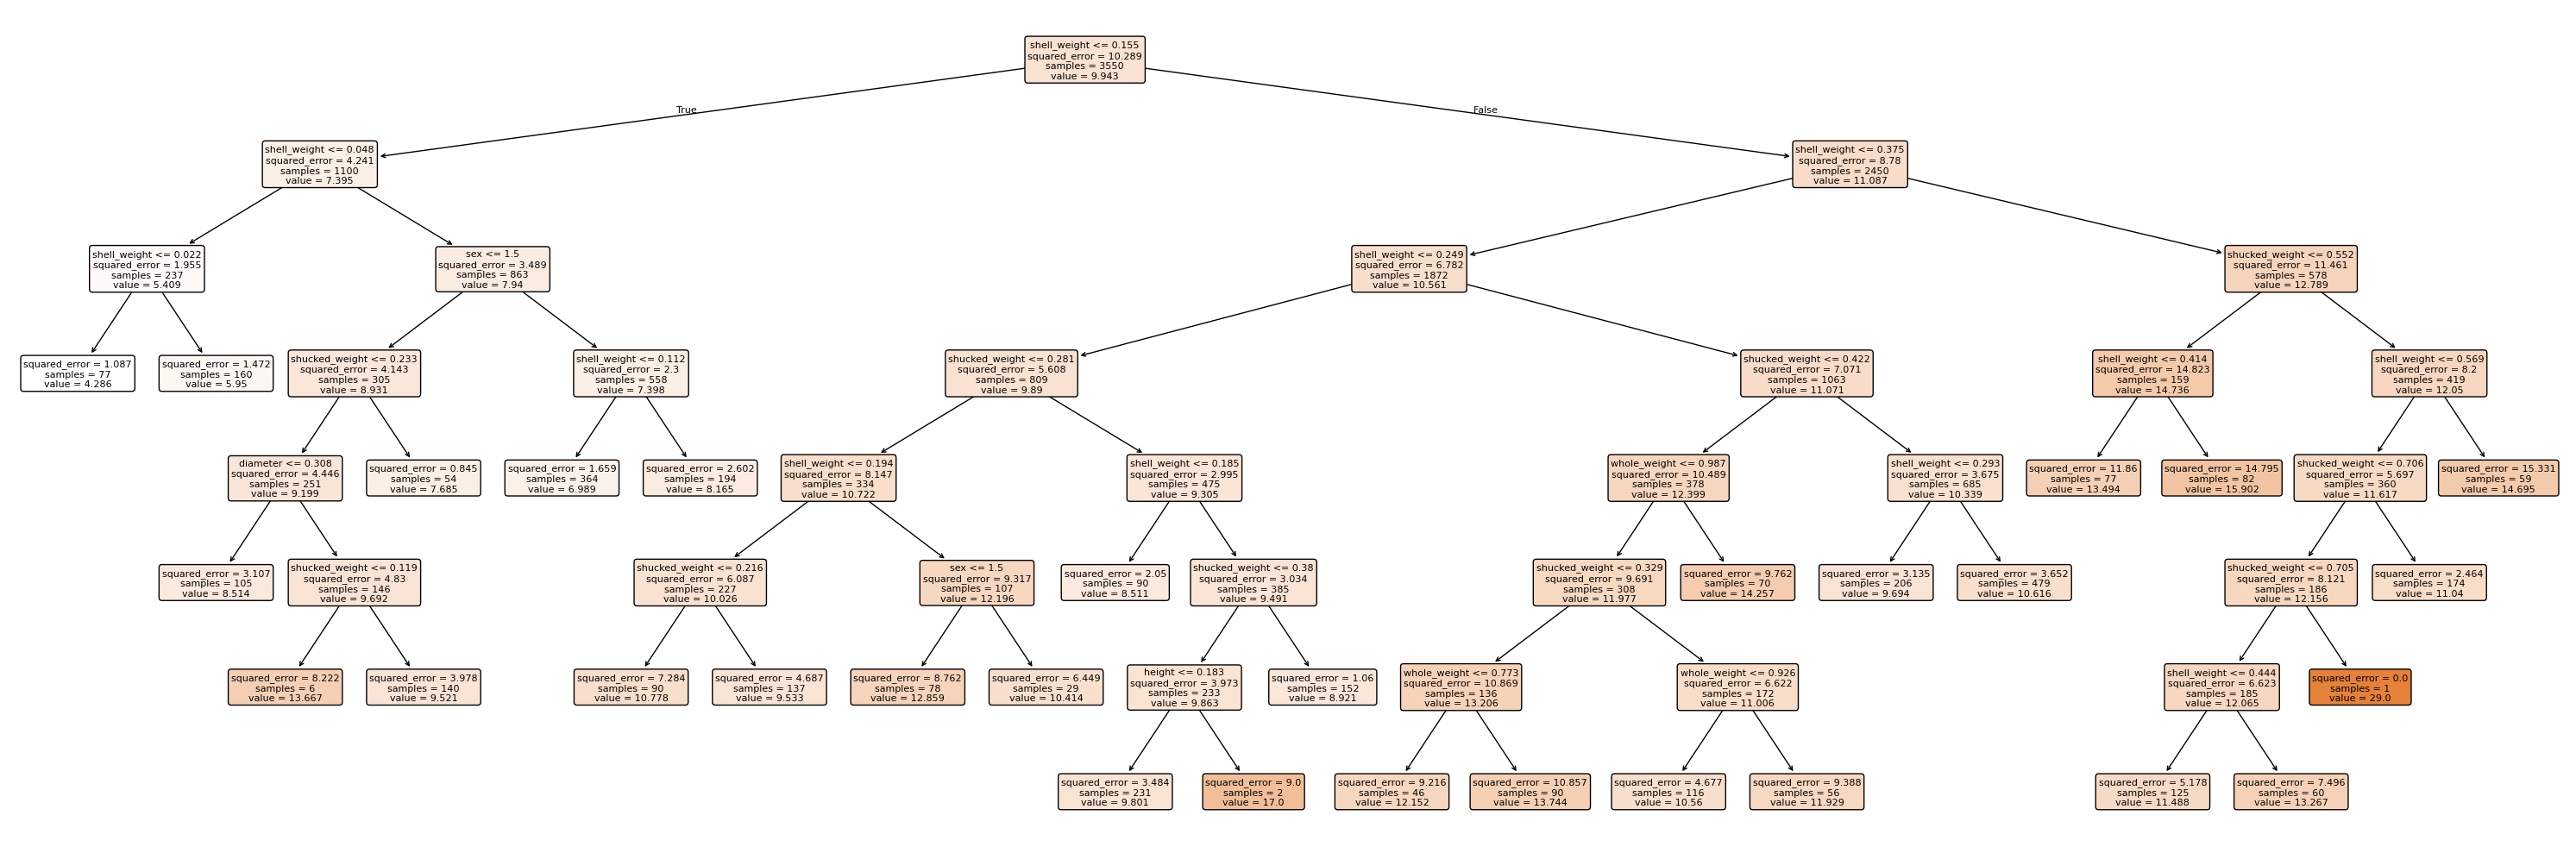

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 10))
plot_tree(
    optim_dt_regressor.best_estimator_,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=8
)

plt.tight_layout()
plt.show()

## Task 10

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

svr = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        SVR()
    ),
    param_grid={
        'svr__C': [0.1, 1, 10, 100],
        'svr__gamma': ['scale', 'auto'],
        'svr__epsilon': [0.01, 0.1, 1],
        'svr__kernel': ['poly', 'rbf', 'sigmoid'],
    },
    cv=5,
    refit=True,
    n_jobs=-1
)

svr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1, 10, 100],
                         'svr__epsilon': [0.01, 0.1, 1],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['poly', 'rbf', 'sigmoid']})

In [19]:
print(f'train R^2={svr.score(X_train, y_train):.3f}')
print(f'test R^2={svr.score(X_test, y_test):3f}')

train R^2=0.594
test R^2=0.584458
